#GOAL: Compare stock performance over time by using the Capital Asset Pricing Model. 

# CAPM describes the relationship between expected return and risk.

# We'll also compare the results of different allocation amounts among the chosen stocks in the portfolio.  

### IMPORT LIBRARIES/DATASETS AND VISUALIZE STOCKS DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [4]:
# Read the stock data file
stocks_df = pd.read_csv('/content/drive/MyDrive/UdemyML/Part 2. Financial Analysis in Python/stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [5]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [6]:
# Create function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x



```
# This is formatted as code
```
# More tasks
- **Create a function to plot stocks data in an interactive way using Plotly Express**
- **Call the function and visualize the stocks data** 
- **Call the function visualize normalized stocks data**
- **Note: Check earlier lectures if you get stuck** 

In [7]:
# Create function to plot data using plotly express
# function takes in a dataframe and title
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x=df['Date'], y = df[i], name=i)
  fig.show()

In [8]:
interactive_plot(stocks_df, "Pretty Graph of Stocks (Not Normalized)")

In [9]:
interactive_plot(normalize(stocks_df),'Pretty Graph of Stocks (Normalized)')

### CALCULATE DAILY RETURNS

In [10]:
# Function to calculate the daily returns - takes in a dataframe, creates a copy and gets the daily change 
def daily_returns(df):
  df_daily_return = df.copy()

  for i in df.columns[1:]:
    df_daily_return[i] = df[i].pct_change() * 100
    df_daily_return[i][0] = 0
    
  return df_daily_return

In [11]:
# Get the daily returns 
stocks_daily_returns = daily_returns(stocks_df)
stocks_daily_returns

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222




```
# This is formatted as code
```

### Thought Exercise
- **Which of the following has higher average daily return?**
   - S&P500 or Google
   - S&P500 or Amazon


In [12]:
stocks_daily_returns['sp500'].mean() > stocks_daily_returns['GOOG'].mean()
# GOOG average daily returns are higher than sp500

False

In [13]:
stocks_daily_returns['sp500'].mean() > stocks_daily_returns['AMZN'].mean()
# AMZN avg daily returns are higher than sp500

False

### CALCULATE BETA FOR A SINGLE STOCK




In [14]:
# Select any stock, let's say Apple 
stocks_daily_returns['AAPL']

0       0.000000
1      -0.374946
2       1.164812
3       1.038382
4      -0.316937
          ...   
2154    0.362467
2155    3.488923
2156   -2.449458
2157    1.453480
2158   -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [15]:
# Select the S&P500 (Market)
stocks_daily_returns['sp500']

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

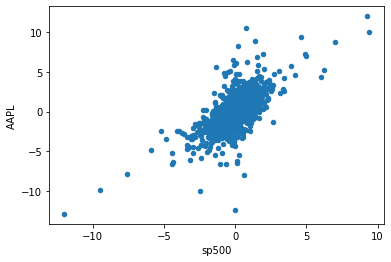

In [16]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_returns.plot(kind='scatter', x = 'sp500', y = 'AAPL')

In [17]:
px.scatter(x = stocks_daily_returns['sp500'], y = stocks_daily_returns['AAPL'])

In [18]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!
# Alpha is excess return on top of the market
beta, alpha = np.polyfit(stocks_daily_returns['sp500'], stocks_daily_returns['AAPL'], 1)
print("For {} stock Beta is {} and Alpha is {}".format('AAPL', beta, alpha))



For AAPL stock Beta is 1.11289241486781 and Alpha is 0.052812084694403016


In [19]:
beta_T, alpha_t = np.polyfit(stocks_daily_returns['sp500'], stocks_daily_returns['T'], 1)
print(beta_T)

0.7446293454747845


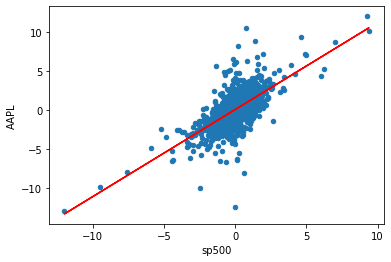

In [20]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_returns.plot(kind='scatter', x = 'sp500', y = 'AAPL')
# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha

plt.plot(stocks_daily_returns['sp500'], beta * stocks_daily_returns['sp500'] + alpha , '-', color = 'r')



In [21]:
# AAPL beta = 1.11289, alpha = 0.05281
# TSLA beta = 1.26861, alpha = 0.17583
# T beta = 0.74463, alpha = -0.28563


### APPLYING THE CAPM FORMULA TO AN INDIVIDUAL STOCK 

In [22]:
beta

1.11289241486781

In [23]:
# Let's calculate the average daily rate of return for S&P500
stocks_daily_returns['sp500'].mean()

0.049316006600389116

In [24]:
# Let's calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = stocks_daily_returns['sp500'].mean() * 252
rm

12.427633663298057

In [25]:
# Assume risk free rate is 1
# Can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 1
# Calculate return for any security (APPL) using CAPM  
ER_AAPL = rf + (beta) * (rm-rf)
ER_AAPL

13.717726823772454

**MINI CHALLENGE #4:**
- **Apply CAPM formula to calculate the return for AT&T**  

In [26]:
ER_T = rf + (beta_T) * (rm-rf)
ER_T

9.509351375027247

### CALCULATE BETA FOR ALL STOCKS




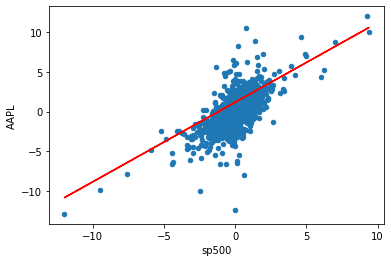

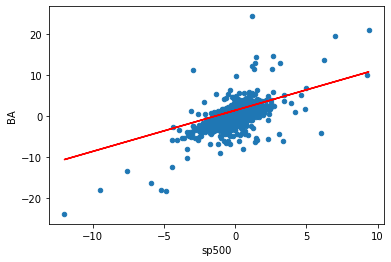

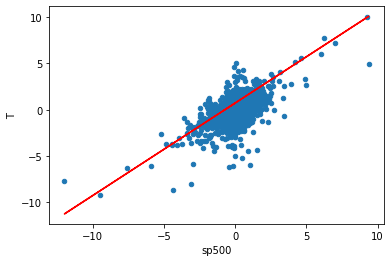

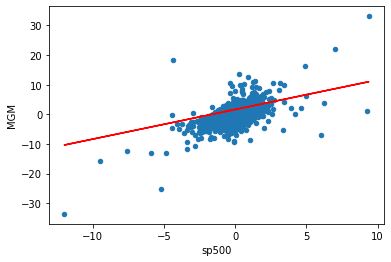

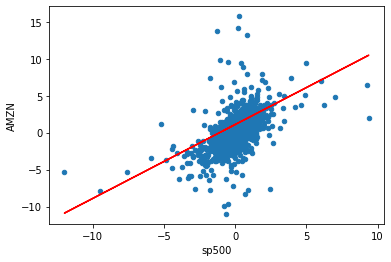

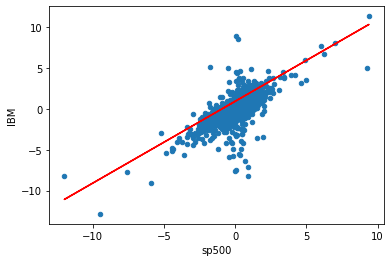

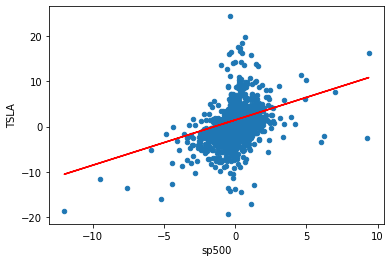

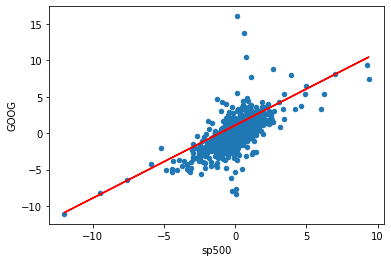

In [27]:
# Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# loop through the columns in our dataframe (excluding date column and sp500) and plot beta for each stock 
for i in stocks_daily_returns.columns:
  if i != 'Date' and i != 'sp500':
    stocks_daily_returns.plot(kind='scatter', x = 'sp500', y=i)
    b, a = np.polyfit(stocks_daily_returns['sp500'], stocks_daily_returns[i], 1)
    plt.plot(stocks_daily_returns['sp500'], b + stocks_daily_returns['sp500'] + a, '-', color = 'r')

    beta[i] = b
    alpha[i] = a

    plt.show()

In [28]:
# Let's view Beta for every stock 
beta

{'AAPL': 1.11289241486781,
 'AMZN': 0.9917345712576846,
 'BA': 1.3828672010892782,
 'GOOG': 1.0348817687428562,
 'IBM': 0.9604149148095246,
 'MGM': 1.6535677065180117,
 'T': 0.7446293454747845,
 'TSLA': 1.268615010109591}

In [29]:
# Let's view alpha for each of the stocks
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,” 
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 0.17%.
alpha


{'AAPL': 0.052812084694403016,
 'AMZN': 0.10221396417765267,
 'BA': -0.0022906983297528876,
 'GOOG': 0.033355587214670177,
 'IBM': -0.05345494150445107,
 'MGM': -0.01688530552047859,
 'T': -0.028563430198461512,
 'TSLA': 0.17583492165165834}

## - **Using Plotly Express, plot an interactive plot showing S&P500 daily returns vs. every stock**
- **Plot the best fit straight line (with Alpha and Beta values)**  


In [30]:
# Loop through the columns in our dataframe (again skipping over the Date column and the sp500) 
# Plotly express graphs come out much nicer looking and can be more interactive (hover over data points)

for i in stocks_daily_returns.columns:
  if i != 'Date' and i != 'sp500':
    fig = px.scatter(stocks_daily_returns, x = 'sp500', y = i, title= i)
    b, a = np.polyfit(stocks_daily_returns['sp500'], stocks_daily_returns[i], 1)
    fig.add_scatter(x = stocks_daily_returns['sp500'], y = (b * stocks_daily_returns['sp500'] + a))
    fig.show()

### APPLY CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [31]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [32]:
# Define the expected return dictionary
ER = {}

rf = 0
rm = stocks_daily_returns['sp500'].mean() * 252

for i in keys:
  ER[i] = rf + (beta[i] * (rm - rf))

In [33]:
# Loop through our stocks and print the Expected Return for each one
for i in keys:
  print('Expected return for {} is {}%'.format(i, round(ER[i],4)))

Expected return for AAPL is 13.8306%
Expected return for BA is 17.1858%
Expected return for T is 9.254%
Expected return for MGM is 20.5499%
Expected return for AMZN is 12.3249%
Expected return for IBM is 11.9357%
Expected return for TSLA is 15.7659%
Expected return for GOOG is 12.8611%


In [34]:
# Weighing each stock equally in our portfolio to start
portfolio_weights = 1/8 * np.ones(8)
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [35]:
# Assume equal weights in the portfolio
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

14.213489176792518

In [36]:
# Calculate the portfolio return 
print('Expected return based on CAPM for the portfolio is {}%'.format(round(ER_portfolio,4)))

Expected return based on CAPM for the portfolio is 14.2135%


In [37]:
# Assuming 50% in AAPL and 50% in AMZN here
ER_1 = 0.5 * ER['AAPL'] + 0.5 * ER['AMZN']
ER_1

13.077766590729365

In [41]:
# What about 25% in TSLA, 25% in AMZN, 25% in GOOG, and 25% in AAPL? 
ER_2 = 0.25 * ER['TSLA'] + 0.25 * ER['AMZN'] + 0.25 * ER['GOOG'] + .25 * ER['AAPL']
ER_2

13.695636823406012

In [42]:
# What about 50% TSLA and 50% AMZN
ER_3 = 0.5 * ER['TSLA'] + 0.5 * ER['AMZN']
ER_3

14.045398274110813